## ¿Que pasaria si cambio la masa solar de 1 metro solar a 2 metros solares? del efecto de mareas


## ¿Que pasaria si cambio la masa solar de 1 metro solar a 2 metros solares? del efecto de mareas


# Procedimiento

El simulador ya esta configurado para que el sol tena 1 masa solar, lo unico que hare es cambiar ese unico valor a 2 y registrar en una hoja de excel, los cambios en en planeta tierra.

Se usara un temporizador y se registraran los datos en intervalos de 1 minuto.
Cada minuto que pasa, pauso la simulacion, lo registro y continuo. Asi, 20 veces.

Los datos se registran en el tablero "resumen" de los resultados.
La velocidad configurada para Universe Sandox de la dinamica de la simulacion es de 16.5 dia por segundo.


ADVERTENCIA


1.  Simplificaciones y aproximaciones: Universe Sandbox utiliza modelos y  algoritmos simplificados para simular fenómenos astronómicos. Estas simplificaciones pueden implicar supuestos y aproximaciones que no reflejan completamente la complejidad de los eventos reales. Por lo tanto, los resultados obtenidos en la simulación pueden diferir de los observados en la realidad.
2.   Precisión y datos actualizados: Los datos y parámetros utilizados en Universe Sandbox se basan en información científica conocida hasta la fecha de desarrollo del programa. Sin embargo, la ciencia y la astronomía están en constante evolución, y nuevos descubrimientos pueden modificar o agregar conocimientos sobre el universo. Por lo tanto, algunos datos o características específicas de objetos astronómicos pueden no ser completamente precisos o actualizados en la simulación.

3. Precisión y datos actualizados: Los datos y parámetros utilizados en Universe Sandbox se basan en información científica conocida hasta la fecha de desarrollo del programa. Sin embargo, la ciencia y la astronomía están en constante evolución, y nuevos descubrimientos pueden modificar o agregar conocimientos sobre el universo. Por lo tanto, algunos datos o características específicas de objetos astronómicos pueden no ser completamente precisos o actualizados en la simulación.

4. Interacciones simplificadas: Aunque Universe Sandbox simula interacciones gravitatorias y otros fenómenos astronómicos, es importante tener en cuenta que el programa utiliza modelos simplificados para representar estas interacciones. Las complejidades del universo real, como la interacción entre múltiples cuerpos celestes, pueden ser difíciles de simular con precisión absoluta en un entorno virtual.

5. Interpretación y extrapolación: Al realizar análisis y conclusiones basados en las simulaciones de Universe Sandbox, es fundamental comprender que la extrapolación de resultados y la interpretación de los fenómenos simulados deben hacerse con cautela. Los resultados obtenidos en la simulación no deben tomarse como evidencia científica concluyente sin realizar investigaciones adicionales y consultar fuentes científicas confiables.



# LIBRERIAS-BOOKCASES

In [ ]:
!pip install empiricaldist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for empiricaldist: filename=empiricaldist-0.6.8-py3-none-any.whl size=12107 sha256=5a9f13d8b58f09c6a8573c995e0125b46d6d0c36e2ab9bf176fd41ae5af90975
  Stored in directory: /root/.cache/pip/wheels/ba/30/d8/653166652404970cf48ec032ff1e90784bb804739d1834fc01
Successfully built empiricaldist


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import scipy.stats
from empiricaldist import Pmf, Cdf
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss


DEFINICIONES

Radio solar, R☉:
Radio limite de Roche x, y, z:
Magnitud de la tension de marea, GN:
Efecto termico de marea, TW:




# BASE DE DATOS - DATABASE

In [ ]:
exp= pd.read_csv("/content/ExperimentoMareas.csv")
exp

,Unnamed: 0,radio_solar,r_ limit_ roche_ X,r_ limit_ roche_ Y,r_ limit_ roche_ Z,magnitud_tension_marea,efecto_termico_marea
0,Sesion1,1.29,0.8850,0.3230,0.3360,6.32+9,0.394
1,Sesion2,3.81,0.7830,0.0749,0.6170,2.44E+11,9.180
2,Sesion3,9.43,0.9200,0.3890,0.0491,1.61E+10,1.530
3,Sesion4,9.70,0.6940,0.2250,0.6840,1.48E+10,0.742
4,Sesion5,4.17,0.9180,0.3630,0.1620,1.86E+11,13.100
5,Sesion6,8.41,0.1440,0.3980,0.9060,2.27E+10,1.690
6,Sesion7,1.01,0.2700,0.2750,0.9230,1.32E+10,0.442
7,Sesion8,6.51,0.8730,0.0819,0.4810,4.89E+10,1.550
8,Sesion9,5.42,0.7960,0.2630,0.5450,8.48E+10,6.880
9,Sesion10,9.62,0.9200,0.3840,0.0828,1.52E+10,1.640


# Colecta y validación de datos - Data collection and validation


¿Qué tipo de dato son las variables del conjunto de datos? - What type of data are the variables in the data set?


In [ ]:
(
    exp
 .dtypes
 .value_counts()
)


float64    5
object     2
dtype: int64

¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos? - How many variables of each data type do we have in the data set?

In [ ]:
exp.shape

(20, 7)

¿Existen valores nulos explícitos en un conjunto de datos? - Are there explicit null values ​​in a data set?

In [ ]:
(
    exp
 .isnull()
 .any()
)


Unnamed: 0                False
radio_solar               False
r_ limit_ roche_ X        False
r_ limit_ roche_ Y        False
r_ limit_ roche_ Z        False
magnitud_tension_marea    False
efecto_termico_marea      False
dtype: bool

Como podemos ver, la base de datos no tiene valores nulos

# CONTEOS Y PROPORCIONES - COUNTS AND PROPORTIONS

Todas las variables - all variables

In [ ]:
exp.describe(include= "all")

,Unnamed: 0,radio_solar,r_ limit_ roche_ X,r_ limit_ roche_ Y,r_ limit_ roche_ Z,magnitud_tension_marea,efecto_termico_marea
count,20,20.000000,20.000000,20.00000,20.00000,20,20.000000
unique,20,NaN,NaN,NaN,NaN,20,NaN
top,Sesion1,NaN,NaN,NaN,NaN,6.32+9,NaN
freq,1,NaN,NaN,NaN,NaN,1,NaN
mean,NaN,5.483000,0.666280,0.27492,0.53984,NaN,3.616000
std,NaN,3.251345,0.285913,0.12352,0.32107,NaN,4.703254
min,NaN,1.010000,0.051600,0.03470,0.01240,NaN,0.394000
25%,NaN,3.180000,0.552500,0.25350,0.29250,NaN,0.955000
50%,NaN,5.450000,0.770000,0.30450,0.60050,NaN,1.660000
75%,NaN,8.595000,0.893250,0.37875,0.78575,NaN,3.845000


Me interesa ver el efecto termico de marea -
I'm interested in seeing the tidal thermal effect

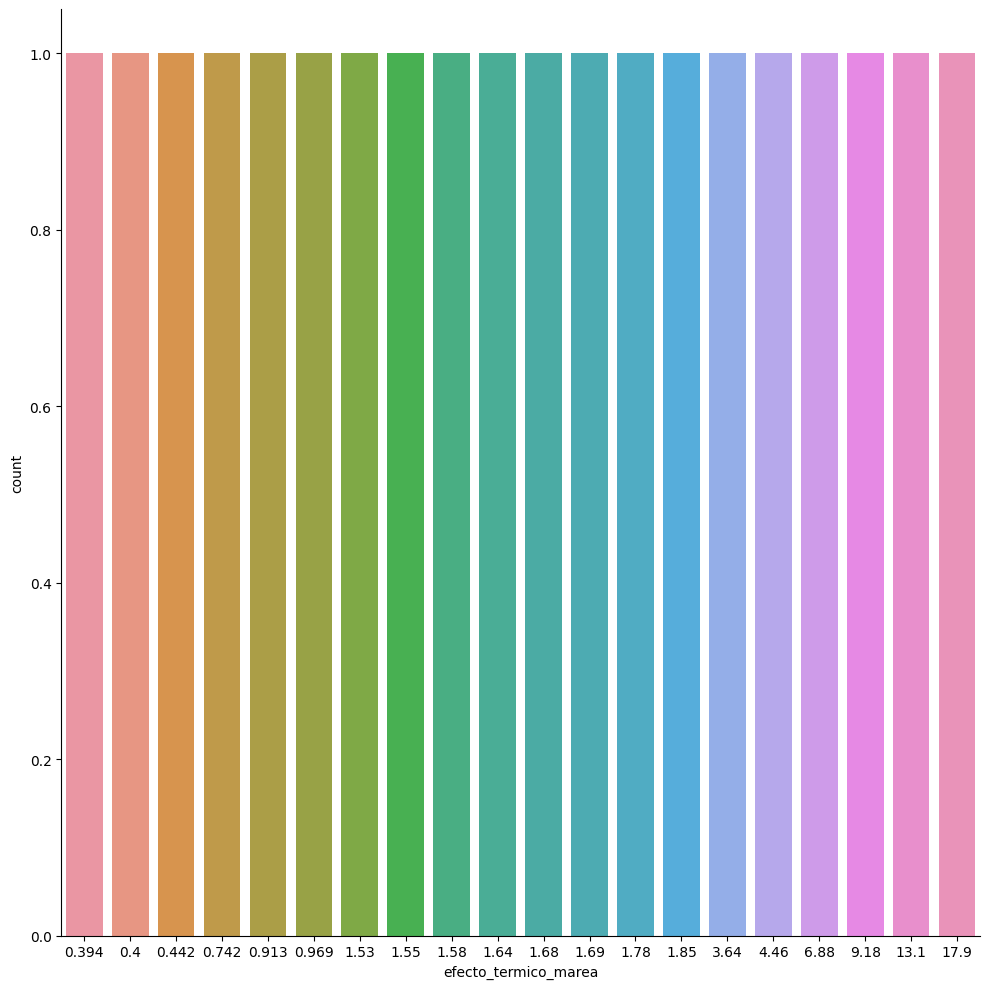

In [ ]:
sns.catplot(
    data=exp,
    x="efecto_termico_marea",
    kind="count",
    height=10,
)



# MEASURES OF CENTRAL TENDENCY - medidas de tendencia central

In [ ]:
media= exp.mean()
media

<ipython-input-54-1e960fa03cde>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  media= exp.mean()


radio_solar             5.48300
r_ limit_ roche_ X      0.66628
r_ limit_ roche_ Y      0.27492
r_ limit_ roche_ Z      0.53984
efecto_termico_marea    3.61600
dtype: float64

In [ ]:
exp.median()

<ipython-input-60-2691ea3622cc>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  exp.median()


radio_solar             5.4500
r_ limit_ roche_ X      0.7700
r_ limit_ roche_ Y      0.3045
r_ limit_ roche_ Z      0.6005
efecto_termico_marea    1.6600
dtype: float64

In [ ]:
exp.mode()

,Unnamed: 0,radio_solar,r_ limit_ roche_ X,r_ limit_ roche_ Y,r_ limit_ roche_ Z,magnitud_tension_marea,efecto_termico_marea
0,Sesion1,1.01,0.92,0.269,0.0124,1.27E+10,0.394
1,Sesion10,NaN,NaN,NaN,0.0395,1.29E+10,0.400
2,Sesion11,NaN,NaN,NaN,0.0491,1.32E+10,0.442
3,Sesion12,NaN,NaN,NaN,0.0828,1.33E+10,0.742
4,Sesion13,NaN,NaN,NaN,0.1620,1.43E+11,0.913
5,Sesion14,NaN,NaN,NaN,0.3360,1.48E+10,0.969
6,Sesion15,NaN,NaN,NaN,0.4810,1.52E+10,1.530
7,Sesion16,NaN,NaN,NaN,0.4910,1.61E+10,1.550
8,Sesion17,NaN,NaN,NaN,0.5450,1.70E+10,1.580
9,Sesion18,NaN,NaN,NaN,0.5840,1.76E+10,1.640


# MEDIDAS DE DISPERCION

In [ ]:
exp.max()

Unnamed: 0                 Sesion9
radio_solar                    9.7
r_ limit_ roche_ X           0.958
r_ limit_ roche_ Y           0.398
r_ limit_ roche_ Z           0.923
magnitud_tension_marea    8.48E+10
efecto_termico_marea          17.9
dtype: object

In [ ]:
exp.min()

Unnamed: 0                 Sesion1
radio_solar                   1.01
r_ limit_ roche_ X          0.0516
r_ limit_ roche_ Y          0.0347
r_ limit_ roche_ Z          0.0124
magnitud_tension_marea    1.27E+10
efecto_termico_marea         0.394
dtype: object

In [ ]:
exp.max(numeric_only=True)-exp.min(numeric_only=True)

radio_solar              8.6900
r_ limit_ roche_ X       0.9064
r_ limit_ roche_ Y       0.3633
r_ limit_ roche_ Z       0.9106
efecto_termico_marea    17.5060
dtype: float64

In [ ]:
exp.std()

<ipython-input-65-5aed33473e50>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  exp.std()


radio_solar             3.251345
r_ limit_ roche_ X      0.285913
r_ limit_ roche_ Y      0.123520
r_ limit_ roche_ Z      0.321070
efecto_termico_marea    4.703254
dtype: float64

In [ ]:
exp.quantile()

<ipython-input-71-caa9fe2cd854>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  exp.quantile()


radio_solar             5.4500
r_ limit_ roche_ X      0.7700
r_ limit_ roche_ Y      0.3045
r_ limit_ roche_ Z      0.6005
efecto_termico_marea    1.6600
Name: 0.5, dtype: float64

Distribucion de las variables del efecto termico de la marea

In [ ]:
exp.quantile()

<ipython-input-76-caa9fe2cd854>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  exp.quantile()


radio_solar             5.4500
r_ limit_ roche_ X      0.7700
r_ limit_ roche_ Y      0.3045
r_ limit_ roche_ Z      0.6005
efecto_termico_marea    1.6600
Name: 0.5, dtype: float64

In [ ]:
rankquantile= (
    exp
 .quantile(q=[0.75,0.50,0.25])
 .transpose()
 .rename_axis("variable")
 .reset_index()
 .assign(
    iqr=lambda NameFunction3: NameFunction3[0.75]-NameFunction3[0.25]
 )
)
rankquantile

<ipython-input-81-fbe740a6336a>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  exp


,variable,0.75,0.5,0.25,iqr
0,radio_solar,8.59500,5.4500,3.1800,5.41500
1,r_ limit_ roche_ X,0.89325,0.7700,0.5525,0.34075
2,r_ limit_ roche_ Y,0.37875,0.3045,0.2535,0.12525
3,r_ limit_ roche_ Z,0.78575,0.6005,0.2925,0.49325
4,efecto_termico_marea,3.84500,1.6600,0.9550,2.89000


<Axes: >

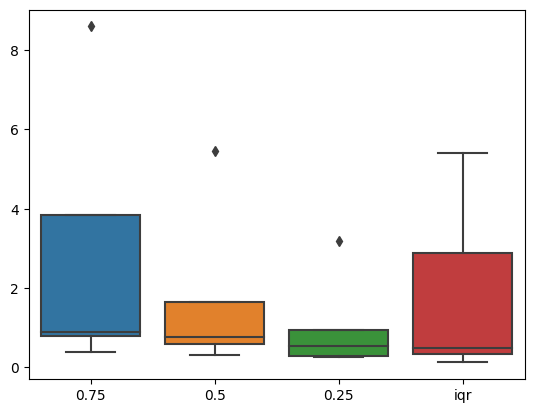

In [ ]:
sns.boxplot(
    data=rankquantile,



)


# DISTRIBUCIONES - DISTRIBUTIONS

Funciones de probabilidad de masas - Mass probability functions

<Axes: xlabel='efecto_termico_marea', ylabel='Probability'>

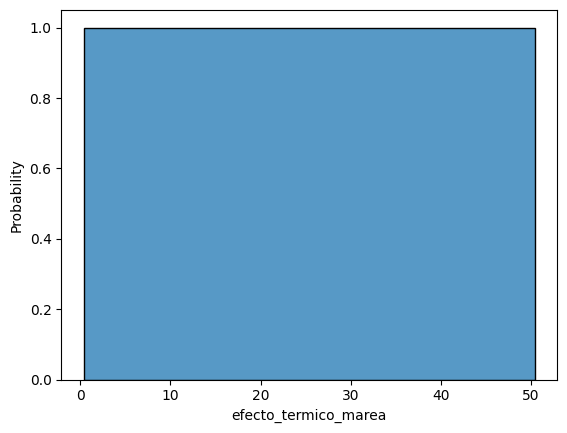

In [ ]:
sns.histplot(
    data=exp,
    x="efecto_termico_marea",
    binwidth=50,
    stat="probability"
)


Funciones empíricas de probabilidad acumulada - Empirical cumulative probability functions

<Axes: xlabel='efecto_termico_marea', ylabel='Proportion'>

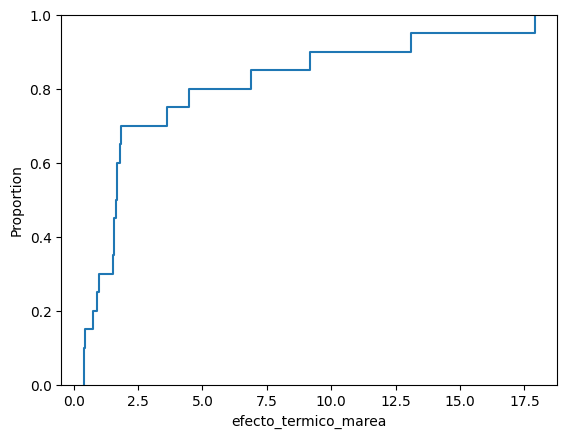

In [ ]:
sns.ecdfplot(
    data=exp,
    x="efecto_termico_marea",
)


Voy a comparar el efecto termico de marea con la magnitud_tension_marea

<Axes: xlabel='efecto_termico_marea', ylabel='Proportion'>

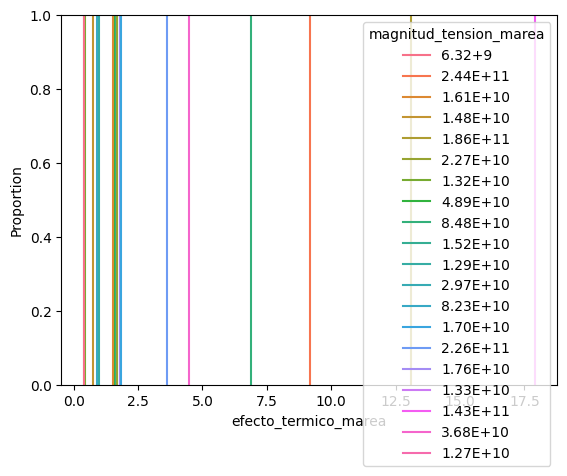

In [ ]:
sns.ecdfplot(
    data=exp,
    x="efecto_termico_marea",
    hue="magnitud_tension_marea",

)



FUNCIONES DE DENSIDAD DE PROBABILIDAD - PROBABILITY DENSITY FUNCTIONS

<Axes: xlabel='efecto_termico_marea', ylabel='Density'>

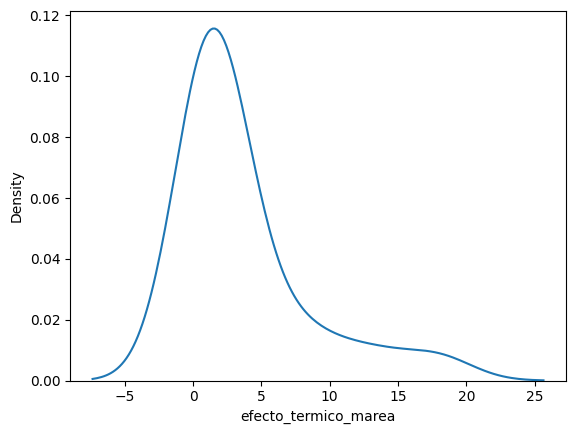

In [ ]:
sns.kdeplot(
    data=exp,
    x="efecto_termico_marea",

)


# ANALISIS BIVARIADO - BIVARIATE ANALYSIS

Estableciendo relaciones

Quiero ver la relacion que tiene el efecto termico de marea con la magnitud de tension de la marea - I want to see the relationship that the tidal thermal effect has with the magnitude of tidal stress

<Axes: xlabel='efecto_termico_marea', ylabel='magnitud_tension_marea'>

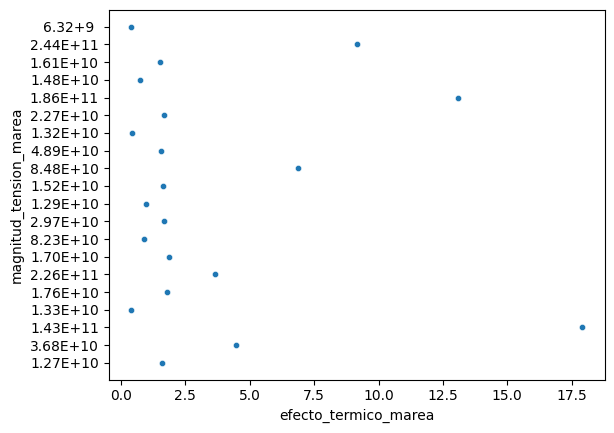

In [ ]:
sns.scatterplot(
    data=exp,
    x="efecto_termico_marea",
    y="magnitud_tension_marea",
    alpha=1,
    s=20
)


Quiero ver la relacion del efecto termico de marea con el limite de roche en eje x -
I want to see the relationship of the tidal thermal effect with the Roche limit in x axis

<Axes: xlabel='efecto_termico_marea', ylabel='r_ limit_ roche_ X'>

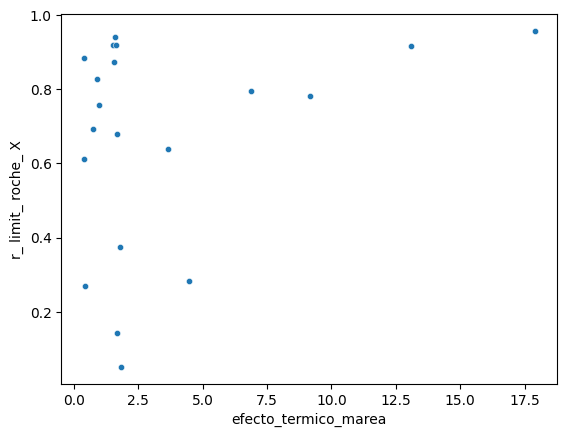

In [ ]:
sns.scatterplot(
    data=exp,
    x="efecto_termico_marea",
    y="r_ limit_ roche_ X",
    alpha=1,
    s=20
)

<Axes: xlabel='efecto_termico_marea', ylabel='r_ limit_ roche_ Y'>

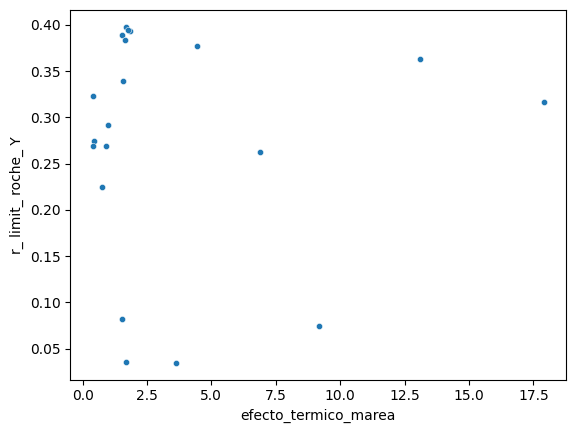

In [ ]:
sns.scatterplot(
    data=exp,
    x="efecto_termico_marea",
    y="r_ limit_ roche_ Y",
    alpha=1,
    s=20
)

# MATRICES DE CORRELACION - CORRELATION MATRIX

In [ ]:
exp_corr= exp.corr()
exp_corr

<ipython-input-146-be9069fb2c37>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  exp_corr= exp.corr()


,radio_solar,r_ limit_ roche_ X,r_ limit_ roche_ Y,r_ limit_ roche_ Z,efecto_termico_marea
radio_solar,1.000000,-0.252675,0.184465,0.105180,-0.085697
r_ limit_ roche_ X,-0.252675,1.000000,-0.229646,-0.849970,0.307580
r_ limit_ roche_ Y,0.184465,-0.229646,1.000000,-0.205770,-0.004111
r_ limit_ roche_ Z,0.105180,-0.849970,-0.205770,1.000000,-0.391105
efecto_termico_marea,-0.085697,0.307580,-0.004111,-0.391105,1.000000


<Axes: >

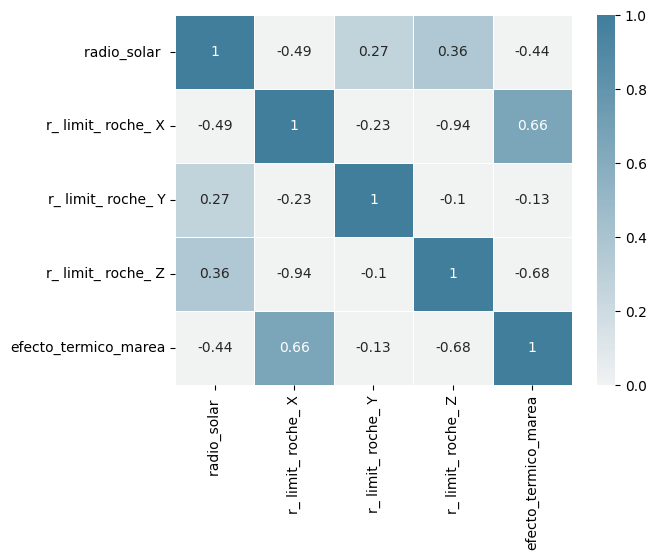

In [ ]:
sns.heatmap(
    data=exp_corr.corr(),
    cmap=sns.diverging_palette(20,230,as_cmap=True),
    center=0,
    vmin=0,
    vmax=1,
    linewidths=0.5,
    annot=True,

)


# SIMPLE REGRESSION ANALYSIS - ANALISIS DE REGRESION SIMPLE

<Axes: xlabel='efecto_termico_marea', ylabel='r_ limit_ roche_ X'>

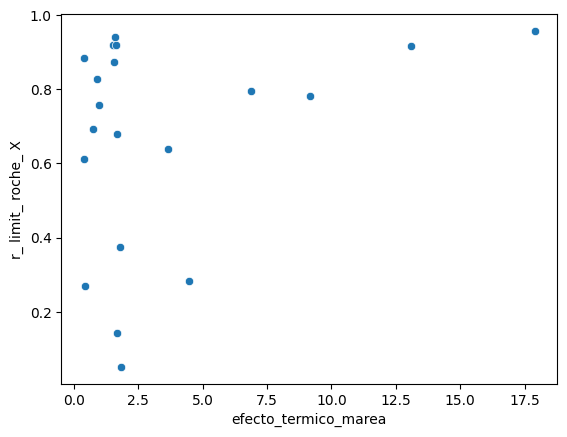

In [ ]:
sns.scatterplot(
    data=exp,
    x="efecto_termico_marea",
    y="r_ limit_ roche_ X",
)


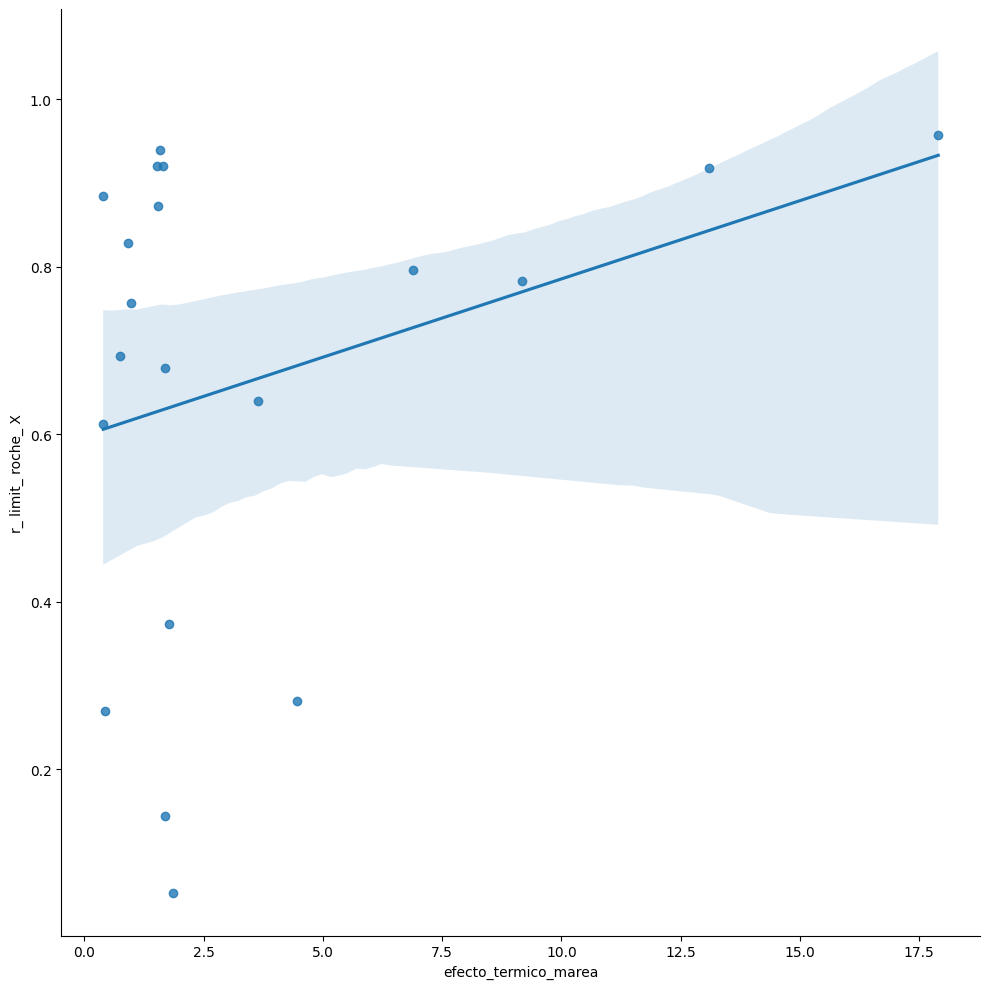

In [ ]:

sns.lmplot(
    data=exp,
    x="efecto_termico_marea",
    y="r_ limit_ roche_ X",
    height=10
)


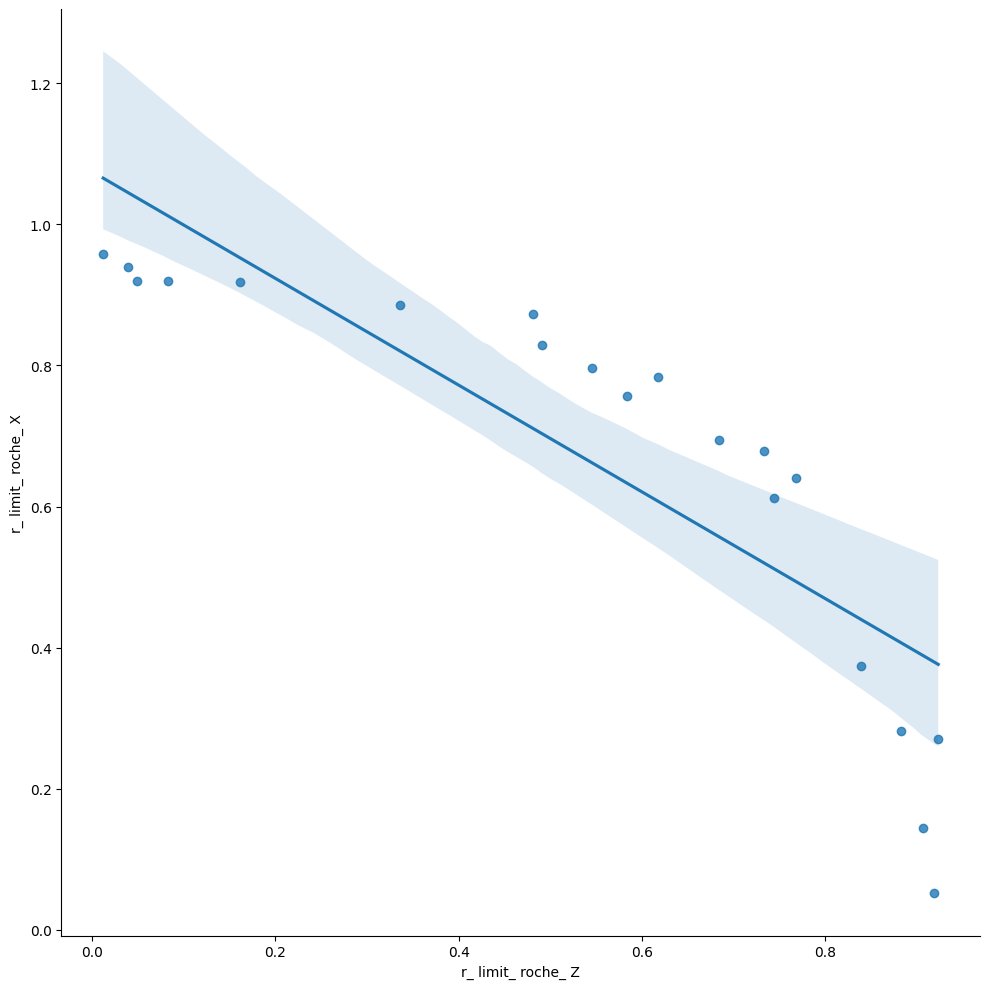

In [ ]:
sns.lmplot(
    data=exp,
    x="r_ limit_ roche_ Z",
    y="r_ limit_ roche_ X",
    height=10
)


# ANALISIS MULTIVARIADO - MULTIVARIATE ANALYSIS

In [ ]:
model1= (
    smf.ols(
        data=exp,
        formula="efecto_termico_marea ~ magnitud_tension_marea",

    )
    .fit()
)
model1.summary()


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1687: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     efecto_termico_marea   R-squared:                       1.000
Model:                              OLS   Adj. R-squared:                    nan
Method:                   Least Squares   F-statistic:                       nan
Date:                  Wed, 21 Jun 2023   Prob (F-statistic):                nan
Time:                          22:08:29   Log-Likelihood:                 637.49
No. Observations:                    20   AIC:                            -1235.
Df Residuals:                         0   BIC:                            -1215.
Df Model:                            19                                         
Covariance Type:              nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              1.5800        inf          0        nan         nan         nan
magnitud_tension_marea[T.1.29E+10]    -0.6110        inf         -0        nan         nan         nan
magnitud_tension_marea[T.1.32E+10]    -1.1380        inf         -0        nan         nan         nan
magnitud_tension_marea[T.1.33E+10]    -1.1800        inf         -0        nan         nan         nan
magnitud_tension_marea[T.1.43E+11]    16.3200        inf          0        nan         nan         nan
magnitud_tension_marea[T.1.48E+10]    -0.8380        inf         -0        nan         nan         nan
magnitud_tension_marea[T.1.52E+10]     0.0600        inf          0        nan         nan         nan
magnitud_tension_marea[T.1.61E+10]    -0.0500        inf         -0        nan         nan         nan
magnitud_tension_marea[T.1.70E+10]     0.2700        inf          0        nan         nan         nan
magnitud_tension_marea[T.1.76E+10]     0.2000        inf          0        nan         nan         nan
magnitud_tension_marea[T.1.86E+11]    11.5200        inf          0        nan         nan         nan
magnitud_tension_marea[T.2.26E+11]     2.0600        inf          0        nan         nan         nan
magnitud_tension_marea[T.2.27E+10]     0.1100        inf          0        nan         nan         nan
magnitud_tension_marea[T.2.44E+11]     7.6000        inf          0        nan         nan         nan
magnitud_tension_marea[T.2.97E+10]     0.1000        inf          0        nan         nan         nan
magnitud_tension_marea[T.3.68E+10]     2.8800        inf          0        nan         nan         nan
magnitud_tension_marea[T.4.89E+10]    -0.0300        inf         -0        nan         nan         nan
magnitud_tension_marea[T.6.32+9 ]     -1.1860        inf         -0        nan         nan         nan
magnitud_tension_marea[T.8.23E+10]    -0.6670        inf         -0        nan         nan         nan
magnitud_tension_marea[T.8.48E+10]     5.3000        inf          0        nan         nan         nan
==============================================================================
Omnibus:                        3.137   Durbin-Watson:                   2.443
Prob(Omnibus):                  0.208   Jarque-Bera (JB):                1.361
Skew:                          -0.211   Prob(JB):                        0.506
Kurtosis:                       1.794   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
modelos_resultados= pd.DataFrame(
    dict(
        actual_value=exp.efecto_termico_marea,
         prediction_model1= model1.predict(),

    )
)
modelos_resultados


,actual_value,prediction_model1
0,0.394,0.394
1,9.180,9.180
2,1.530,1.530
3,0.742,0.742
4,13.100,13.100
5,1.690,1.690
6,0.442,0.442
7,1.550,1.550
8,6.880,6.880
9,1.640,1.640


<Axes: >

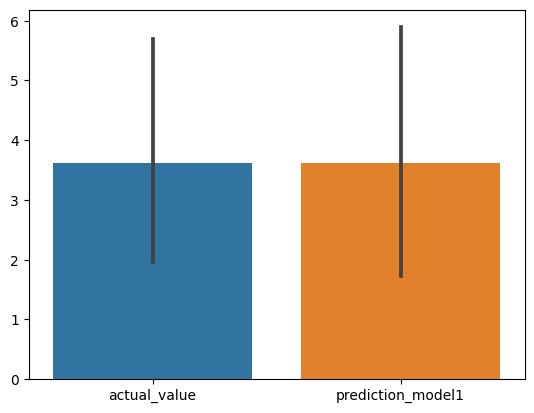

In [ ]:
sns.barplot(
    data= modelos_resultados
)

ECDFs

<Axes: ylabel='Proportion'>

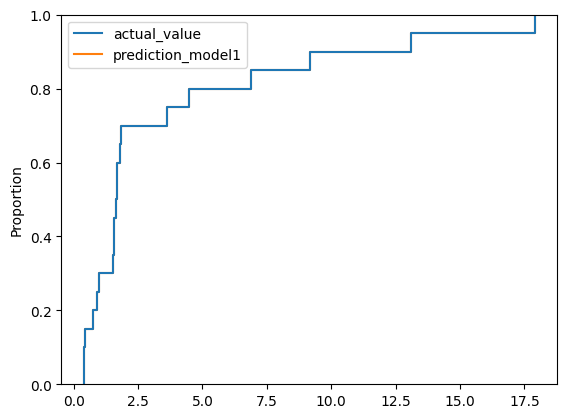

In [ ]:
sns.ecdfplot(
    data=modelos_resultados
)


<Axes: ylabel='Density'>

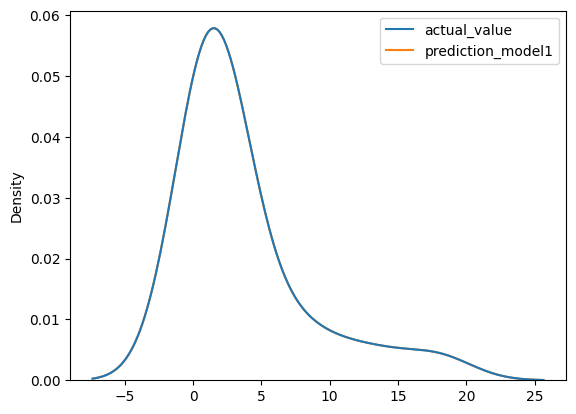

In [ ]:
sns.kdeplot(
    data=modelos_resultados
)


ANALISIS DE REGRESION LOGISTICA - LOGISTIC REGRESSION ANALYSIS

In [ ]:
smf.mnlogit(
    formula="efecto_termico_marea ~ magnitud_tension_marea",
    data=exp,

).fit().summary()


/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:4206: SpecificationWarning: endog contains values are that not int-like. Uses string representation of value. Use integer-valued endog to suppress this warning.
  warnings.warn(msg, SpecificationWarning)


         Current function value: 0.000000
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:4247: RuntimeWarning: invalid value encountered in sqrt
  bse = np.sqrt(np.diag(self.cov_params()))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           MNLogit Regression Results                           
================================================================================
Dep. Variable:     efecto_termico_marea   No. Observations:                   20
Model:                          MNLogit   Df Residuals:                     -360
Method:                             MLE   Df Model:                          361
Date:                  Wed, 21 Jun 2023   Pseudo R-squ.:                   1.000
Time:                          22:28:08   Log-Likelihood:            -1.3709e-07
converged:                        False   LL-Null:                       -59.915
Covariance Type:              nonrobust   LLR p-value:                     1.000
======================================================================================================
          efecto_termico_marea=0.4       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              3.3861    3.9e+05   8.68e-06      1.000   -7.65e+05    7.65e+05
magnitud_tension_marea[T.1.29E+10]    -0.5244   9.47e+05  -5.54e-07      1.000   -1.86e+06    1.86e+06
magnitud_tension_marea[T.1.32E+10]    -0.5254   1.75e+06  -3.01e-07      1.000   -3.42e+06    3.42e+06
magnitud_tension_marea[T.1.33E+10]    36.2859        nan        nan        nan         nan         nan
magnitud_tension_marea[T.1.43E+11]    -0.5229   4.94e+05  -1.06e-06      1.000   -9.67e+05    9.67e+05
magnitud_tension_marea[T.1.48E+10]    -0.5253   1.07e+06  -4.89e-07      1.000    -2.1e+06     2.1e+06
magnitud_tension_marea[T.1.52E+10]    -0.5247   9.02e+05  -5.82e-07      1.000   -1.77e+06    1.77e+06
magnitud_tension_marea[T.1.61E+10]    -0.5245   1.17e+06  -4.48e-07      1.000   -2.29e+06    2.29e+06
magnitud_tension_marea[T.1.70E+10]    -0.5246   1.35e+06  -3.89e-07      1.000   -2.64e+06    2.64e+06
magnitud_tension_marea[T.1.76E+10]    -0.5245    1.1e+06  -4.76e-07      1.000   -2.16e+06    2.16e+06
magnitud_tension_marea[T.1.86E+11]    -0.5228   4.99e+05  -1.05e-06      1.000   -9.79e+05    9.79e+05
magnitud_tension_marea[T.2.26E+11]    -0.5238   4.05e+05  -1.29e-06      1.000   -7.94e+05    7.94e+05
magnitud_tension_marea[T.2.27E+10]    -0.5253   1.34e+06  -3.93e-07      1.000   -2.62e+06    2.62e+06
magnitud_tension_marea[T.2.44E+11]    -0.5253   3.39e+06  -1.55e-07      1.000   -6.64e+06    6.64e+06
magnitud_tension_marea[T.2.97E+10]    -0.5254   1.66e+06  -3.17e-07      1.000   -3.25e+06    3.25e+06
magnitud_tension_marea[T.3.68E+10]    -0.5246   1.34e+06  -3.92e-07      1.000   -2.62e+06    2.62e+06
magnitud_tension_marea[T.4.89E+10]    -0.5246   1.42e+06   -3.7e-07      1.000   -2.78e+06    2.78e+06
magnitud_tension_marea[T.6.32+9 ]    -22.6402    3.9e+05   -5.8e-05      1.000   -7.65e+05    7.65e+05
magnitud_tension_marea[T.8.23E+10]    -0.5241   5.17e+05  -1.01e-06      1.000   -1.01e+06    1.01e+06
magnitud_tension_marea[T.8.48E+10]    -0.5251   2.66e+06  -1.98e-07      1.000   -5.21e+06    5.21e+06
------------------------------------------------------------------------------------------------------
        efecto_termico_marea=0.442       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -1.9192   1.07e+06  -1.79e-06      1.000    -2.1e+06     2.1e+06
magnitud_tension_marea[T.1.29E+10]    -0.5255   3.16e+06  -1.66e-07      1.000   -6.19e+06    6.19e+06
magnitud_tension_marea[T.1.32E+10]    30.5573   1.97e+06   1.55e-05      1.000   -3.87e+06    3.87e+06
magnitud_tension_marea[T.1.33E+10]    -0.5262   1.37e+09  -3.84e-10      1.000   -2.69e+09    2.69e+09
magnitud_tension_marea[T.1.43E+11]    -0.5251   1.49e+06  -3.51e-07      1.000   -2.93e+06    2.93e+06
magnitud_tension_marea[T.1.48E